### Using Binary Classification to Identify Clicks on Ads
<b>Goal</b>: The goal of this project is to identify effective ways for identifying people who are likely to click on an ad. We will be training several classification models (Logistic Regression, k-Nearest Neighbors, Random Forest Classifier) to detect ad clicks from their personal profile and comparing different model performances to identify the best model.

<b>Data Problem</b>: The data task is to train and tune multiple binary classification models that group potential customer base into clicks v. non-clicks.

<b>Expected Results</b>: The expected results of this project is a quality model with high accuracy that can be used to predict, from future/unseen group of people, whether they are likely to click on an ad.

<b>Data</b>

The data is sourced from Kaggle.

Link: https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad/data

#### Import and Setup

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

#### Data Overview

* 1,000 samples/rows
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [3]:
data=pd.read_csv('advertising.csv')

In [4]:
print(data.shape)
data.head()

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
# No null values!
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
# General statistics for each numeric feature
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 1.0, 'Histogram of Daily Time Spent on Site Range')

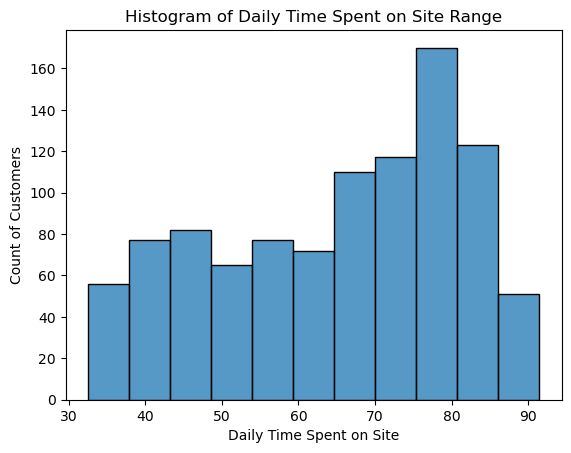

In [18]:
# Histogram of Key Features - Daily Time Spent on Site
sns.histplot(data, x = 'Daily Time Spent on Site')
plt.ylabel('Count of Customers')
plt.title('Histogram of Daily Time Spent on Site Range')

## The data is slightly skewed toward low amount of daily time spent

Text(0.5, 1.0, 'Histogram of Customer Age Range')

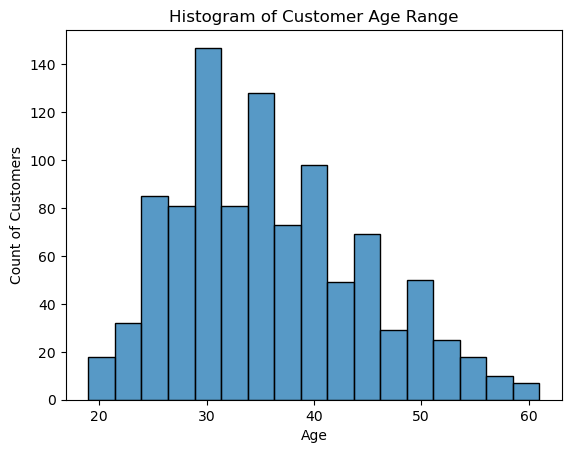

In [15]:
# Histogram of Key Features - Age
sns.histplot(data, x = 'Age')
plt.ylabel('Count of Customers')
plt.title('Histogram of Customer Age Range')

## The data roughly represents a typical population age demographic

Text(0.5, 1.0, 'Histogram of Area Income Range')

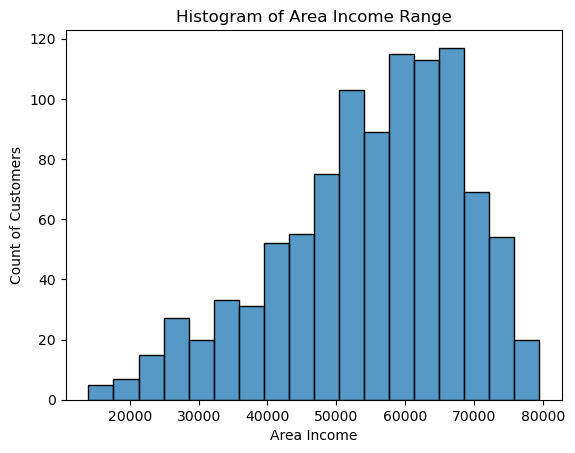

In [17]:
# Histogram of Key Features - Area Income
sns.histplot(data, x = 'Area Income')
plt.ylabel('Count of Customers')
plt.title('Histogram of Area Income Range')

## The data is slightly skewed toward low area income

Text(0.5, 1.0, 'Histogram of Daily Internet Usage Range')

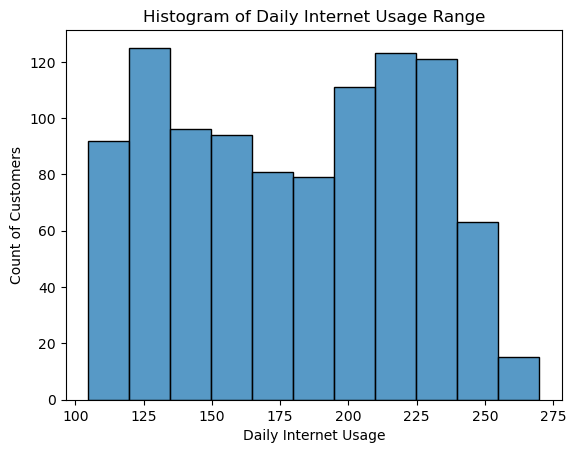

In [19]:
# Histogram of Key Features - Daily Internet Usage
sns.histplot(data, x = 'Daily Internet Usage')
plt.ylabel('Count of Customers')
plt.title('Histogram of Daily Internet Usage Range')

## The data shows slight bipolar patterns, peaking at both low and high daily internet usage

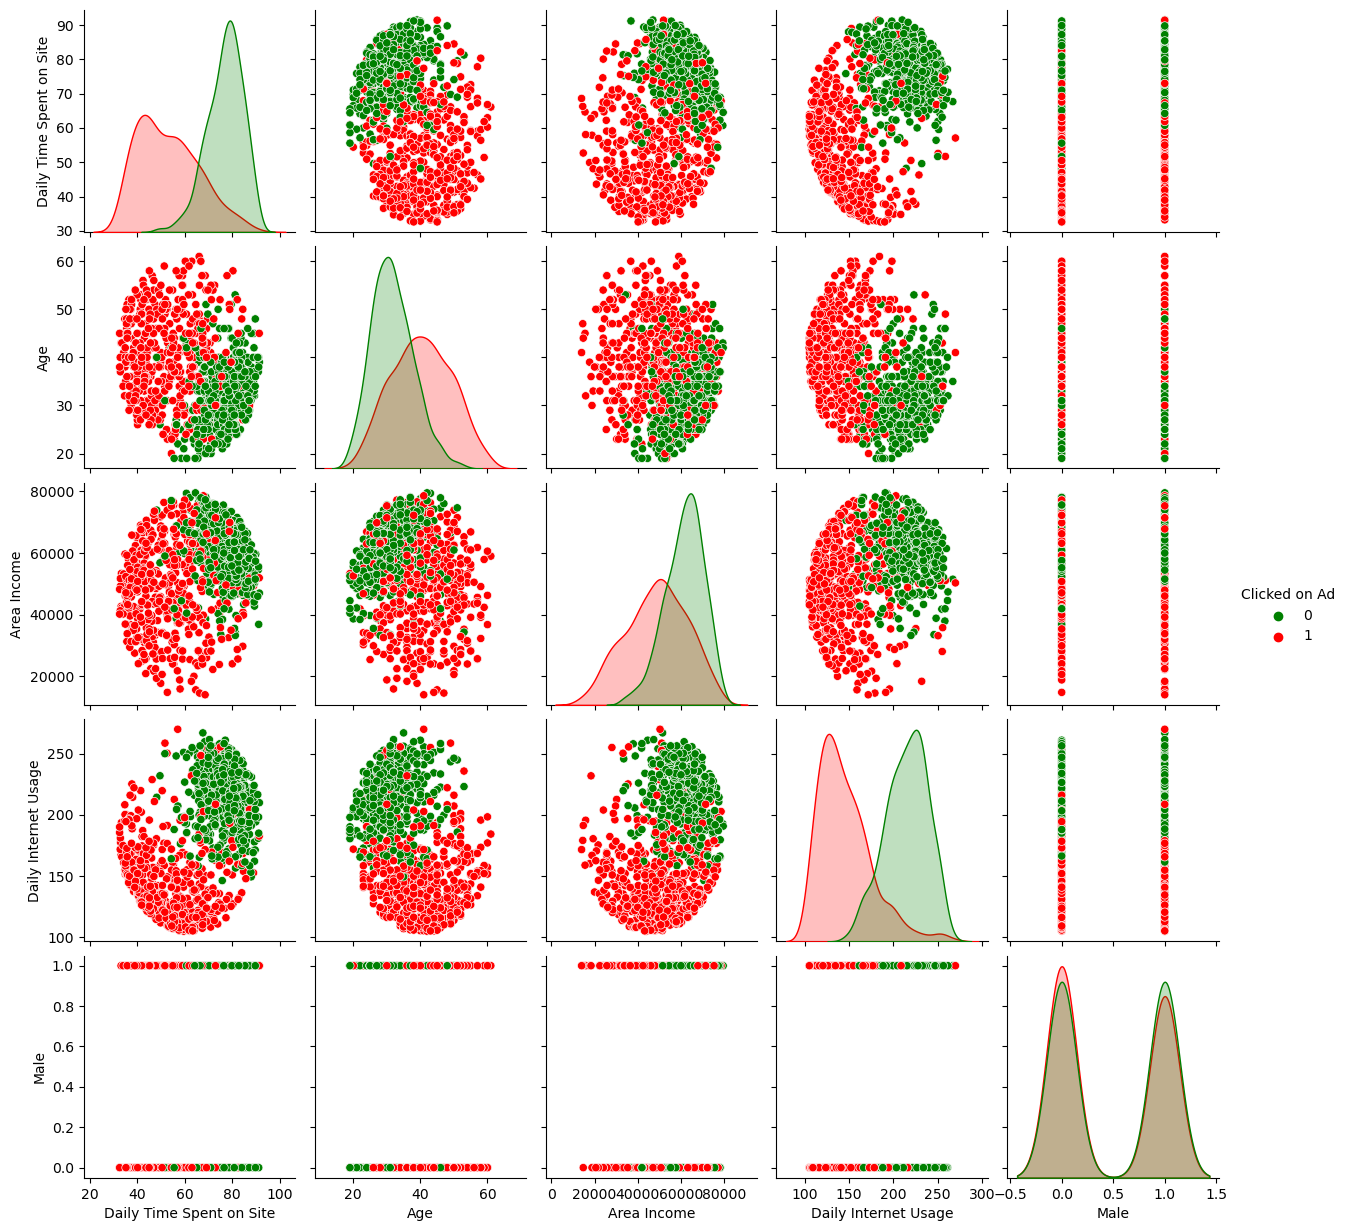

In [22]:
# Pairplot with colors denoting those who clicked (red) and those who didn't (green)
sns.pairplot(data, hue = 'Clicked on Ad', palette = ['green','red'])

## Those who clicked show the following characteristics:
#### Spend less time on site
#### Older
#### Lower income
#### Lower daily internet usage 
#### Female

C:\Users\hanwo\AppData\Local\Temp\ipykernel_2424\1056160523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'Greens')


<Axes: >

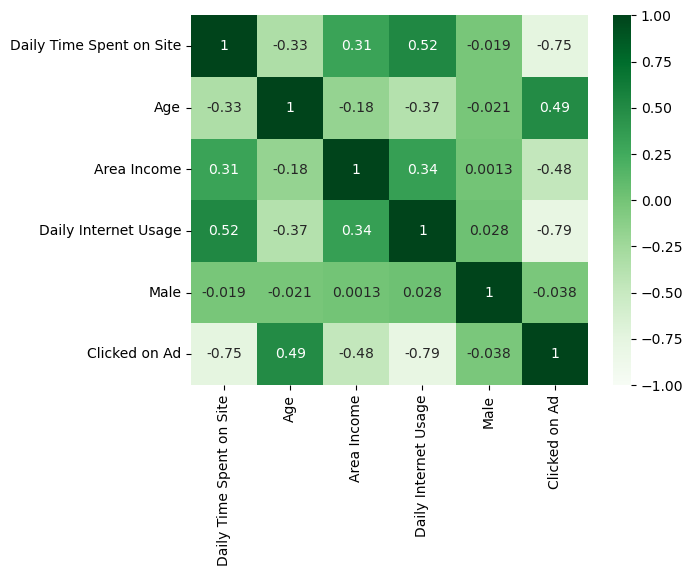

In [25]:
# Heatmap to better understand features' cross-correlation, as well as leading candidates for modeling features
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'Greens')

#### Split data into test and training

In [248]:
x = data.drop(columns=data.select_dtypes(exclude='number').columns)
y = data[['Clicked on Ad']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Logistic Regression

In [249]:
# Define logistic regression model
logistic = LogisticRegression(max_iter=1000)

In [250]:
# Define parameter grid
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalties = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver = solvers, penalty = penalties, C = c_values)

In [251]:
# Perform grid search
grid_search = GridSearchCV(estimator = logistic, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

C:\Users\hanwo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hanwo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hanwo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hanwo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Valu

In [252]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 1.0


In [253]:
best_params = grid_result.best_params_
logistic = LogisticRegression(**best_params)
logistic.fit(X_train, y_train.values.ravel())

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [254]:
# Evaluations
pred = pd.DataFrame(logistic.predict(X_test),columns = y_test.columns, index = y_test.index)

In [255]:
metrics.confusion_matrix(pred,y_test)

array([[100,   0],
       [  0, 100]], dtype=int64)

In [256]:
print(f'accuracy = {metrics.accuracy_score(y_test,pred)*100} %')
print(f'recall = {metrics.recall_score(y_test,pred)*100} %')
print(f'precision = {metrics.precision_score(y_test,pred)*100} %')

accuracy = 100.0 %
recall = 100.0 %
precision = 100.0 %


#### K-Nearest Neighbors

In [257]:
# Define k-nearest neighbors model
knn = KNeighborsClassifier()

In [258]:
# Define parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

In [259]:
# Perform grid search
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

In [260]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.7462500000000001


In [261]:
best_params = grid_result.best_params_
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [262]:
# Evaluations
pred = pd.DataFrame(knn.predict(X_test), columns = y_test.columns, index = y_test.index)

In [263]:
metrics.confusion_matrix(pred,y_test)

array([[84, 24],
       [16, 76]], dtype=int64)

In [264]:
print(f'accuracy = {metrics.accuracy_score(y_test,pred)*100} %')

print(f'recall = {metrics.recall_score(y_test,pred)*100} %')

print(f'precision = {metrics.precision_score(y_test,pred)*100} %')

accuracy = 80.0 %
recall = 76.0 %
precision = 82.6086956521739 %


#### Random Forest

In [265]:
# Define random forest model
rf = RandomForestClassifier()

In [266]:
# Define parameter grid
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [267]:
# Perform grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

In [268]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 1.0


In [269]:
best_params = grid_result.best_params_
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=10)

In [270]:
# Evaluations
pred = pd.DataFrame(rf.predict(X_test), columns = y_test.columns, index = y_test.index)

In [271]:
metrics.confusion_matrix(pred,y_test)

array([[100,   0],
       [  0, 100]], dtype=int64)

In [272]:
print(f'accuracy = {metrics.accuracy_score(y_test,pred)*100} %')

print(f'recall = {metrics.recall_score(y_test,pred)*100} %')

print(f'precision = {metrics.precision_score(y_test,pred)*100} %')

accuracy = 100.0 %
recall = 100.0 %
precision = 100.0 %


#### Selecting the best model

Of the three models explored, we can easily drop k-nearest neighbors due to the low evaluation scores.  Between logistic regression and random forest, however, it is a bit more nuanced.  Given the limited data set, they both returned perfect evaluation scores - 100% across accuracy, recall, and precision.  In that case, here is my general thought:
* In the short term, I would select the <b>logistic regression</b> model, given far superior model interpretability, computational efficiency, scalability, and probabilistic predictions.
* In the long term, I would gather richer data and re-run the models to re-evaluate model performance